In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

import compression as C
import backports.lzma as lzma
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

ac3 = C.Util.load_data('ac3', 20, '/Volumes/FFRITZ/cs222/ac3/rhoana/')
cyl = C.Util.load_data('cylinder', 4, '/Volumes/FFRITZ/cs222/cylinder/rhoana/')

# maybe this can be tuned
LZMA_filters = [{"id": lzma.FILTER_LZMA1, "preset": lzma.PRESET_EXTREME}]

ValueError: Attempted relative import in non-package

In [7]:
# Compare 2D normal vs inter delta encoded RLE

print 'No Delta', C.Util.get_size(C.LZMA.compress(C.RLE2D.encode(ac3[0]), format=lzma.FORMAT_RAW, filters=LZMA_filters))
print 'With Delta', C.Util.get_size(C.LZMA.compress(C.RLE2D.encode(ac3[0], delta_inter=True), format=lzma.FORMAT_RAW, filters=LZMA_filters))

No Delta 15455
With Delta 16020


In [8]:
# Compare 3D normal vs delta encoded RLE

print 'No Delta', C.Util.get_size(C.LZMA.compress(C.RLE3D.encode(ac3), format=lzma.FORMAT_RAW, filters=LZMA_filters))
print 'With Delta', C.Util.get_size(C.LZMA.compress(C.RLE3D.encode(ac3, delta=True), format=lzma.FORMAT_RAW, filters=LZMA_filters))

No Delta 58062
With Delta 60924


In [61]:
# Compare row vs column RLE

print 'Row', C.RLE2D.encode(ac3[0], dir=0).shape[0], C.Util.get_size(C.LZMA.compress(C.RLE2D.encode(ac3[0], dir=0), format=lzma.FORMAT_RAW, filters=LZMA_filters))
print 'Column', C.RLE2D.encode(ac3[0], dir=1).shape[0], C.Util.get_size(C.LZMA.compress(C.RLE2D.encode(ac3[0], dir=1), format=lzma.FORMAT_RAW, filters=LZMA_filters))

row 41112 15455
col 42994 15139


In [74]:
ids = C.RLE2D.encode(ac3[0:4], dir=0)[3::2]


[ 670 3036  722 4381  749  434  759 1179  793 6112  843 2758  908 2255]
[ 660 3036   18 4744    9 5056   30 4381   27  434   14 1179   31 6112]
[ 672 3036   41 4381   33  434   10 1179   18 6112   14 4191   76 2758]
[ 659 3036   54 4381   37  434   34 6112   85 2758   31 2255   73  654]


In [68]:
print C.RLE2D.encode(ac3[0], dir=0)[2:8]
print C.RLE2D.encode(ac3[0], dir=0, delta=True)[2:8]

[ 670 3036  722 4381  749  434]
[ 670 3036   52 4381   27  434]


In [73]:
rl = np.array(C.RLE2D.encode(ac3[0], dir=0)[2::2])
print C.Util.get_size(C.LZMA.compress(rl.astype(np.uint16), format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(np.diff(rl).astype(np.uint64), format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(C.RLE2D.encode(ac3[0], dir=0), format=lzma.FORMAT_RAW, filters=LZMA_filters))

13956
14984
15455


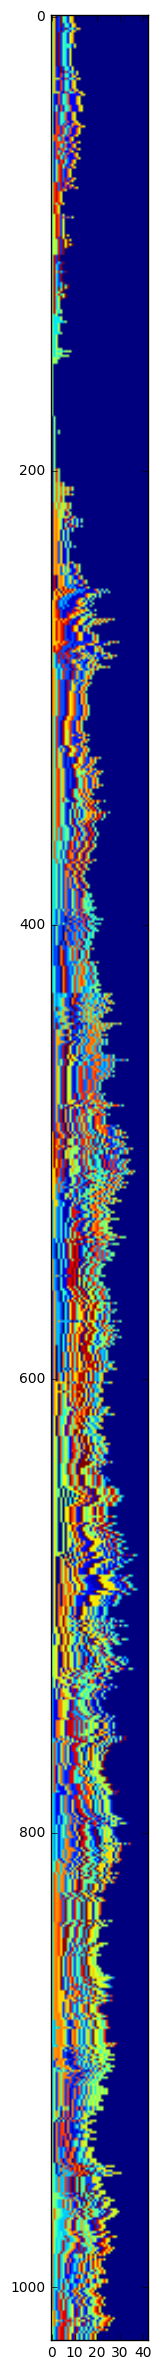

In [14]:
rle = C.RLE3D.decode_ids(C.RLE3D.encode(ac3))

C.Util.adj_fig_size(30,30)
imshow(rle[0])

In [45]:
np.array_equal(ac3[0], C.RLE2D.decode(C.RLE2D.encode(ac3[0])))

True

In [91]:
rle = C.RLE2D.encode(ac3[0])

uint64 uint64
[ 670  722  749  759  793  843  908  993 1014 1024]
0 [ 670  722  749  759  793  843  908  993 1014 1024]
1 [ 670  722  749  759  793  843  908  993 1014 1024]
2 [ 670  723  750  759  794  843  908  992 1014 1024]
3 [ 670  724  750  759  793  844  909  992 1014 1024]
4 [ 671  725  751  760  792  796  844  908  991 1014 1024]
5 [ 673  726  752  761  791  797  845  908  991 1015 1024]
6 [ 674  726  752  753  756  761  791  799  846  908  991 1016 1024]
7 [ 676  727  758  760  790  800  847  908  990 1017 1024]
8 [ 678  728  761  789  801  848  908  988 1018 1024]
9 [ 679  730  762  788  802  849  907  987 1019 1024]


(41112,) -1008 1024 0 2047
14284
13992


<function matplotlib.pyplot.show>

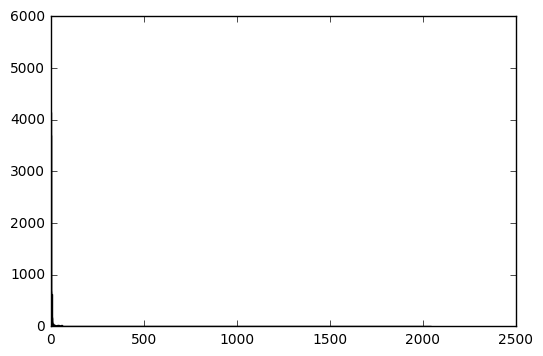

In [18]:
# Test delta intra

rle = C.RLE2D.encode(ac3[0], delta_intra=True)

rl = np.array(rle[2::2], dtype=rle.dtype)
zz_rl = C.zigzag.encode(rl)
print rle.shape, min(rl), max(rl), min(zz_rl), max(zz_rl)

print C.Util.get_size(C.LZMA.compress(rl.astype(np.int16)))
print C.Util.get_size(C.LZMA.compress(zz_rl.astype(np.uint16)))

plt.hist(zz_rl, bins=range(min(zz_rl), max(zz_rl)))
plt.show

In [22]:
print C.Util.get_size(C.LZMA.compress(np.sort(zz_rl).astype(np.uint16)))

1444


In [50]:
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])

c = np.concatenate((a, b), axis=0)

c[-(b.shape[0] - 2)]

8

In [16]:
print C.Util.get_size(C.LZMA.compress(C.RLE2D.encode(ac3[0], delta_intra=True)))
print C.Util.get_size(C.LZMA.compress(C.RLE2D.encode(ac3[0])))
print C.Util.get_size(C.LZMA.compress(C.B2D.encode(ac3[0])))
print C.RLE.encode(ac3[0]).shape
print C.B2D.encode(ac3[0]).shape

23032
15380
14100
(41113,)
(39838,)


In [54]:
assert np.array_equal(ac3, C.RLE3D.decode(C.RLE3D.encode(ac3)))
print 'Original', C.Util.get_size(C.LZMA.compress(C.RLE3D.encode(ac3)))
print '2D Delta Inter', C.Util.get_size(C.LZMA.compress(C.RLE3D.encode(ac3, delta_2d_inter=True)))
print '3D Delta', C.Util.get_size(C.LZMA.compress(C.RLE3D.encode(ac3, delta_3d=True)))

Original 275756
2D Delta Inter 385840
3D Delta 373672


<function matplotlib.pyplot.show>

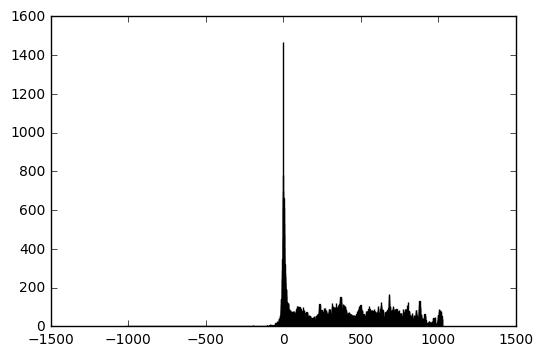

In [51]:
rle = C.RLE3D.encode(ac3, delta_3d=True)

rl = np.array(rle[3::2], dtype=rle.dtype)

plt.hist(rl, bins=range(min(rl), max(rl)))
plt.show

In [56]:
rle = C.RLE3D.encode(ac3, delta_3d=True)

rle_3036 = rle[3::2][np.where(rle[4::2] == 3036)]
print rle_3036.shape
rle_3036[0:20]

1 670 660 -10
2 660 672 12
3 672 659 -13
4 659 657 -2
5 657 649 -8
6 649 199 -450
7 199 628 429
8 628 621 -7
9 621 609 -12
10 609 599 -10
11 599 570 -29
12 570 561 -9
13 561 566 5
14 566 588 22
15 588 586 -2
16 586 591 5
17 591 594 3
18 594 593 -1
19 593 595 2
(23200,)


array([670, 670, 670, 670, 671, 673, 674, 676, 678, 679, 681, 682, 686,
       686, 687, 688, 689, 690, 692, 693])